**Instructions**  

Run the notebook to transform the original dataset into the cleaned dataset used by the models  

This code is all original. The source of the uncleaned dataset is https://www.kaggle.com/manuelbenedicto/figure-eight-labelled-textual-dataset

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('text_emotion.csv')

In [7]:
df

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


Text(0.5, 0, 'Emotion class')

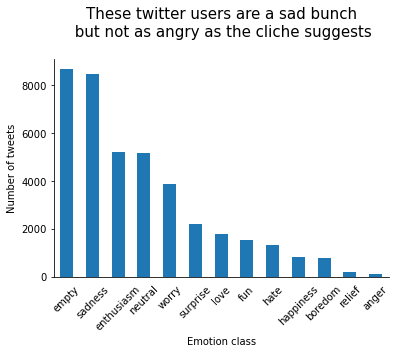

In [8]:
#display distribution of classes in trainset (it's the same distribution in valid and test)
counts=df['sentiment'].value_counts() # count number of instances of each class in the dataset
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
lst=list(df['sentiment'].unique())
counts.plot.bar()
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12], labels=lst, rotation=45)
plt.ylabel('Number of tweets')
plt.tick_params(
    axis='both',          
    which='both',      
    bottom=False)
plt.title('These twitter users are a sad bunch\n but not as angry as the cliche suggests\n', size=15)
plt.xlabel('Emotion class')

In [5]:
# import stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [6]:
#add new column of content with stop words removed
df['tweet_without_stopwords'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [7]:
df

,tweet_id,sentiment,author,content,tweet_without_stopwords
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,@tiffanylue know listenin bad habit earlier st...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,Layin n bed headache ughhhh...waitin call...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,wants hang friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,@dannycastillo We want trade someone Houston t...
...,...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love,Happy Mothers Day All love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...,"Happy Mother's Day mommies there, woman man lo..."
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP...


In [8]:
#remove twitter handles
df = df.replace('@[A-Za-z0-9_]+', '',regex=True).astype('str')
df

,tweet_id,sentiment,author,content,tweet_without_stopwords
0,1956967341,empty,xoshayzers,i know i was listenin to bad habit earlier a...,know listenin bad habit earlier started freak...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,Layin n bed headache ughhhh...waitin call...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,wants hang friends SOON!
4,1956968416,neutral,xkilljoyx,We want to trade with someone who has Houston...,"We want trade someone Houston tickets, one will."
...,...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,,
39996,1753919001,love,drapeaux,Happy Mothers Day All my love,Happy Mothers Day All love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...,"Happy Mother's Day mommies there, woman man lo..."
39998,1753919043,happiness,ipdaman1,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY ...,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY N...


In [11]:
#lemmatise text
import nltk
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    joiner = ''.join(text)
    return joiner

In [12]:
df['tweet_without_stopwords']=df['tweet_without_stopwords'].apply(lambda x:lemmatizer(x))

In [15]:
df

,tweet_id,sentiment,author,content,tweet_without_stopwords
0,1956967341,empty,xoshayzers,i know i was listenin to bad habit earlier a...,know listenin bad habit earlier started freak...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,Layin n bed headache ughhhh...waitin call...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,wants hang friends SOON!
4,1956968416,neutral,xkilljoyx,We want to trade with someone who has Houston...,"We want trade someone Houston tickets, one will."
...,...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,,
39996,1753919001,love,drapeaux,Happy Mothers Day All my love,Happy Mothers Day All love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...,"Happy Mother's Day mommies there, woman man lo..."
39998,1753919043,happiness,ipdaman1,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY ...,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY N...


In [17]:
#remove words of less than three letters as less likely to have high semantic value
df['tweet_without_stopwords']=df['tweet_without_stopwords'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df

,tweet_id,sentiment,author,content,tweet_without_stopwords
0,1956967341,empty,xoshayzers,i know i was listenin to bad habit earlier a...,know listenin habit earlier started freakin part
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,Layin headache ughhhh...waitin call...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,wants hang friends SOON!
4,1956968416,neutral,xkilljoyx,We want to trade with someone who has Houston...,"want trade someone Houston tickets, will."
...,...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,,
39996,1753919001,love,drapeaux,Happy Mothers Day All my love,Happy Mothers love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...,"Happy Mother's mommies there, woman long 'momm..."
39998,1753919043,happiness,ipdaman1,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY ...,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP SINGLES W...


In [ ]:
#NB tokenisation is carred out by the models themselves 